In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# 타이타닉 데이터셋 로드
df = sns.load_dataset('titanic')

In [4]:
#age값이 결측치가 많이 존재 

df.isna().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Text(0.5, 1.0, 'Boxplot plcass, fare, survived')

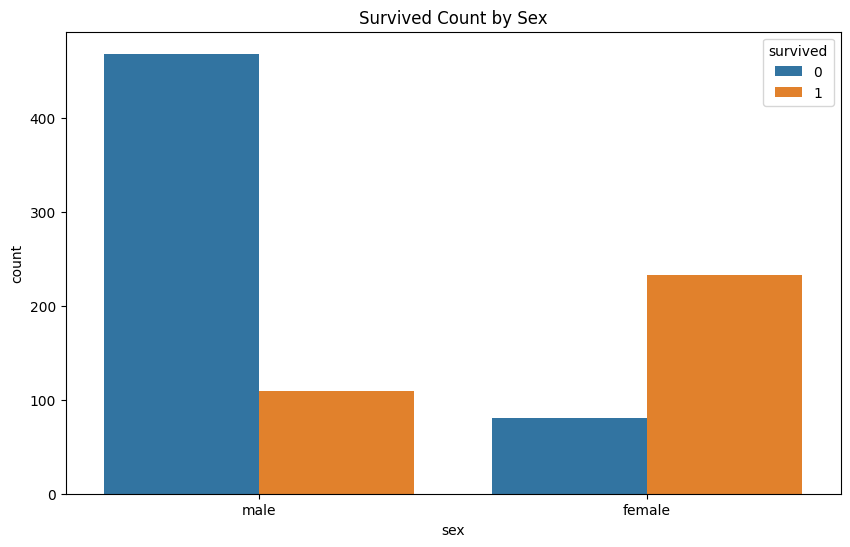

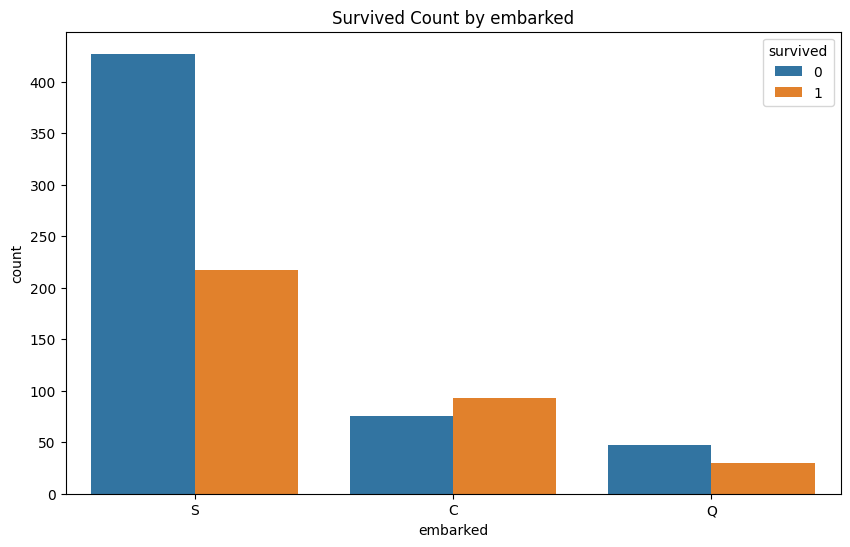

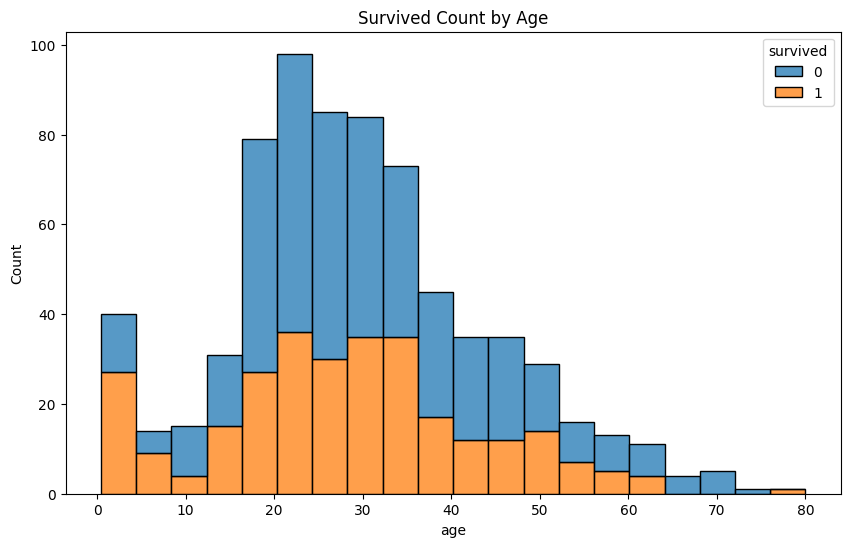

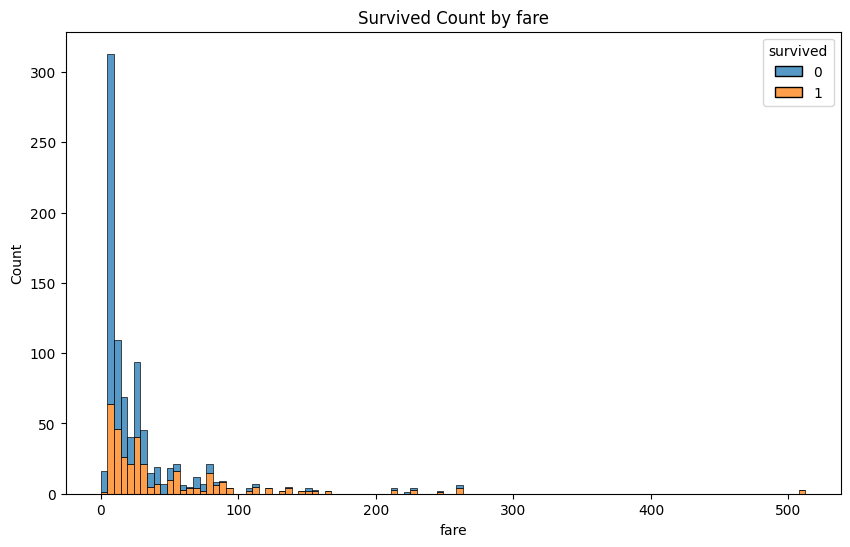

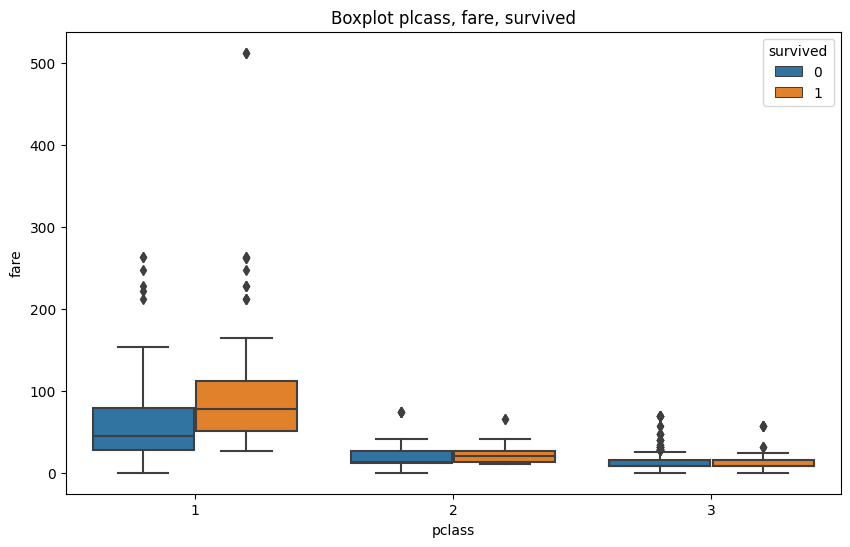

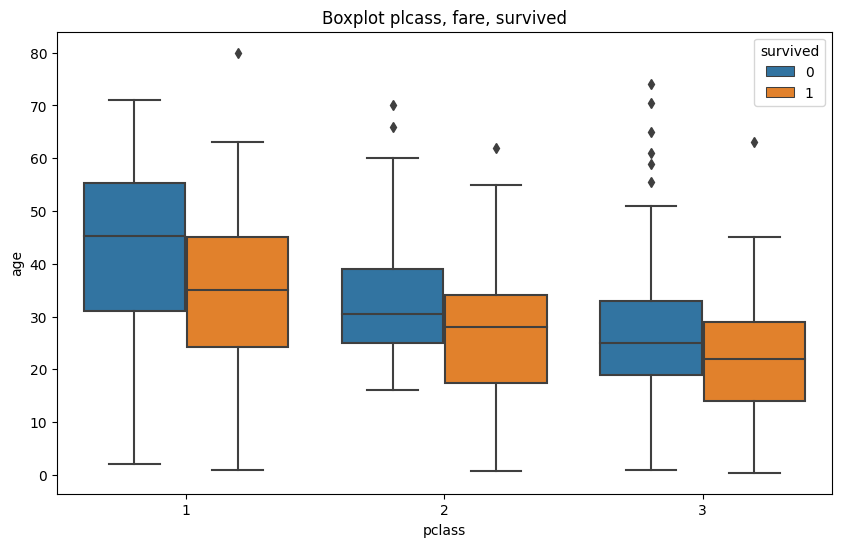

In [14]:
#age, sex, pclass, fare, embarked
#생존에 관련해서 어떤 피처가 중요할지? 먼저 가설을 한 번 확인한 것 

plt.figure(figsize=(10,6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survived Count by Sex')

plt.figure(figsize=(10,6))
sns.countplot(x='embarked', hue='survived', data=df)
plt.title('Survived Count by embarked')

plt.figure(figsize=(10,6))
sns.histplot(x='age', hue='survived',multiple='stack', data=df)
plt.title('Survived Count by Age')


plt.figure(figsize=(10,6))
sns.histplot(x='fare', hue='survived',multiple='stack', data=df)
plt.title('Survived Count by fare')


plt.figure(figsize=(10,6))
sns.boxplot(x='pclass', y='fare',hue='survived', data=df)
plt.title('Boxplot plcass, fare, survived')


plt.figure(figsize=(10,6))
sns.boxplot(x='pclass', y='age',hue='survived', data=df)
plt.title('Boxplot plcass, fare, survived')


In [28]:
## age, fare, embarked, sex 추가적으로 피처를 더 사용
## 베이스라인 모델은 위에 기본적으로 공유주신 피처

## age 결측치가 많았다.
## age 결측치 날리고 분석
# 결측치를 다 날림
df = df.dropna(subset=['age','fare','embarked','sex'])

## 0,1 이진분류, 생존에 대한 예측
## 생존한 피처가 더 적다 288 class 불균형이 존재
## 로지스틱 
## accuracy, precision, recall, f1 기타 등등 confusion matrix

df['sex']=df['sex'].map({'male':0,'female':1})
df=pd.get_dummies(df, columns=['embarked'], drop_first=True)

In [31]:
#인코딩 작업하고 
df=pd.get_dummies(df, columns=['embarked'], drop_first=True)

In [36]:
X = df[['sex','age','fare','embarked_Q','embarked_S']]
y = df['survived']

In [40]:
#학습데이터셋 나누기
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=111)

In [44]:
# 스케일링 작업 
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [47]:
model =LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
# 예측값 출력
# accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_proba= model.predict_proba(X_test)[:,1]

accuracy =accuracy_score(y_test, y_pred)
precision =precision_score(y_test, y_pred)
recall =recall_score(y_test, y_pred)
f1 =f1_score(y_test, y_pred)
roc_auc =roc_auc_score(y_test, y_pred_proba)

print(f'accuracy :{accuracy:.2f}')
print(f'precision :{precision:.2f}')
print(f'recall :{recall:.2f}')
print(f'f1 :{f1:.2f}')
print(f'roc_auc :{roc_auc:.2f}')

# 혼동행렬 보고서 출력
conf_matrix=confusion_matrix(y_test, y_pred)
cls_report=classification_report(y_test, y_pred)
print(conf_matrix)
print(cls_report)

accuracy :0.78
precision :0.80
recall :0.69
f1 :0.74
roc_auc :0.84
[[67 11]
 [20 45]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        78
           1       0.80      0.69      0.74        65

    accuracy                           0.78       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.78      0.78       143



### 결측치를 대치하고 나서 성능 평가

In [60]:
# 타이타닉 데이터셋 로드
df = sns.load_dataset('titanic')

In [63]:
df.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [69]:
## 평균
df_mean = df.copy()
df_mean['age'].fillna(df_mean['age'].mean(), inplace=True)
## 중간값
df_median = df.copy()
df_median['age'].fillna(df_median['age'].median(), inplace=True)

## 최빈값 
df_mode = df.copy()
df_mode['age'].fillna(df_mode['age'].mode()[0],inplace=True)

In [72]:
#데이터 전처리 함수 만들기

def preprocessing_and_evaluate(df, description):
    df['sex']=df['sex'].map({'male':0,'female':1})
    df=pd.get_dummies(df, columns=['embarked'], drop_first=True)
    
    X = df[['sex','age','fare','embarked_Q','embarked_S']]
    y = df['survived']
    #학습데이터셋 나누기
    X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=111)
    
    # 스케일링 작업 
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test= scaler.fit_transform(X_test)
    
    #모델 학습
    model =LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba= model.predict_proba(X_test)[:,1]

    accuracy =accuracy_score(y_test, y_pred)
    precision =precision_score(y_test, y_pred)
    recall =recall_score(y_test, y_pred)
    f1 =f1_score(y_test, y_pred)
    roc_auc =roc_auc_score(y_test, y_pred_proba)

    print(f'accuracy :{accuracy:.2f}')
    print(f'precision :{precision:.2f}')
    print(f'recall :{recall:.2f}')
    print(f'f1 :{f1:.2f}')
    print(f'roc_auc :{roc_auc:.2f}')
    print()


In [73]:
preprocessing_and_evaluate(df_mean, 'Mean')
preprocessing_and_evaluate(df_median, 'Median')
preprocessing_and_evaluate(df_mode, 'Mode')

accuracy :0.78
precision :0.71
recall :0.67
f1 :0.69
roc_auc :0.80

accuracy :0.77
precision :0.70
recall :0.67
f1 :0.68
roc_auc :0.80

accuracy :0.77
precision :0.70
recall :0.67
f1 :0.68
roc_auc :0.79



### 새로운 결측치 대치방법으로 성능이 향상되는지 확인!

In [77]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [97]:
## KNNImputer, MICE, Pclass별로 age를 비교해서 결측치를 대치해 보자!
## 결측치 대치 방법을 바꾸고, Pclass 피처를 이용해서 age 결측치 접근!
## 하나의 피처를 더 추가해 보자!

from sklearn.impute import KNNImputer
from fancyimpute import IterativeImputer

# 타이타닉 데이터셋 로드
df = sns.load_dataset('titanic')

## KNN imputer로 결측치 대체
df_knn=df.copy()
imputer=KNNImputer(n_neighbors=5)
df_knn[['age']]=imputer.fit_transform(df_knn[['age']])

## MICE 방법
df_mice = df.copy()
imputer_mice = IterativeImputer(random_state=111)
df_mice[['age']] = imputer_mice.fit_transform(df_mice[['age']])

## pclass로 결측치 대치 

df_class_mean=df.copy()
df_class_mean['age'] = df_class_mean.groupby('pclass')['age'].transform(lambda x : x.fillna(x.mean()))

In [90]:
preprocessing_and_evaluate(df_knn, 'KNN')
preprocessing_and_evaluate(df_mice, 'MICE')
preprocessing_and_evaluate(df_class_mean, 'Cls_age')

accuracy :0.78
precision :0.71
recall :0.67
f1 :0.69
roc_auc :0.80

accuracy :0.78
precision :0.71
recall :0.67
f1 :0.69
roc_auc :0.80

accuracy :0.78
precision :0.71
recall :0.67
f1 :0.69
roc_auc :0.80



accuracy :0.78
precision :0.71
recall :0.67
f1 :0.69
roc_auc :0.80

accuracy :0.77
precision :0.70
recall :0.67
f1 :0.68
roc_auc :0.80

accuracy :0.77
precision :0.70
recall :0.67
f1 :0.68
roc_auc :0.79

### 조금 더 성능일 올릴 수 있는 방법은?
### 피처를 더 추가해 보자!
- sibsp + parch 동승자 여부
- alone 혼자 탑승한 유무 
- 생존에 어느정도 연결이 될 수 있다.

- age의 binnig 나이대를 'child','Teenager' 등등 구간으로 나눠보면 어떨까?

In [95]:
def preprocessing_and_evaluate_2(df, description):
    df['sex']=df['sex'].map({'male':0,'female':1})
    df=pd.get_dummies(df, columns=['embarked'], drop_first=True)
    
    df['family_size'] = df['sibsp']+df['parch'] +1
    
    df['age_bin']=pd.cut(df['age'], bins= [0,12,20,40,60,80], labels = ['Child','Teeanger','Adult','Middle-aged','Senior'])
    df = pd.get_dummies(df, columns = ['age_bin'], drop_first=True)
    
    X = df[['sex','age','fare','embarked_Q','embarked_S','family_size']+ [col for col in df.columns if col.startswith('age_bin_')]]
    y = df['survived']
    #학습데이터셋 나누기
    X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=111)
    
    # 스케일링 작업 
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test= scaler.fit_transform(X_test)
    
    #모델 학습
    model =LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba= model.predict_proba(X_test)[:,1]

    accuracy =accuracy_score(y_test, y_pred)
    precision =precision_score(y_test, y_pred)
    recall =recall_score(y_test, y_pred)
    f1 =f1_score(y_test, y_pred)
    roc_auc =roc_auc_score(y_test, y_pred_proba)

    print(f'accuracy :{accuracy:.2f}')
    print(f'precision :{precision:.2f}')
    print(f'recall :{recall:.2f}')
    print(f'f1 :{f1:.2f}')
    print(f'roc_auc :{roc_auc:.2f}')
    print()


In [98]:
preprocessing_and_evaluate_2(df_knn, 'KNN')
preprocessing_and_evaluate_2(df_mice, 'MICE')

accuracy :0.80
precision :0.76
recall :0.68
f1 :0.72
roc_auc :0.83

accuracy :0.80
precision :0.76
recall :0.68
f1 :0.72
roc_auc :0.83

